### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
data[data.car.notna()].shape

(108, 26)

In [6]:
data.Bar.value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [7]:
data.CoffeeHouse.value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [8]:
data.CarryAway.value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [9]:
data.RestaurantLessThan20.value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [10]:
data.Restaurant20To50.value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [11]:
data.describe(include = 'all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,12684.000000,12684,12684,12684,108,12577,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,NaN,4351,1870,2013,22,5197,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,0.414144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,0.492593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# since only 108 rows has car value, drop the column
data.drop(columns = ['car'], inplace = True)

In [13]:
# since most of Bar column is "never", replace nas with it
# also contextually, it makes sense to assume "never"
data.Bar = data.Bar.fillna("never")

In [14]:
# assuming that if not specified then its "never"
data.CoffeeHouse = data.CoffeeHouse.fillna("never")
data.CarryAway = data.CarryAway.fillna("never")
data.RestaurantLessThan20 = data.RestaurantLessThan20.fillna("never")
data.Restaurant20To50 = data.Restaurant20To50.fillna("never")

In [15]:
# since the column doesn't differ;
data = data.drop(columns = ['toCoupon_GEQ5min'])

4. What proportion of the total observations chose to accept the coupon? 



In [16]:
data.Y.value_counts() / data.shape[0]
# 56% of the data accept the coupon

1    0.568433
0    0.431567
Name: Y, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

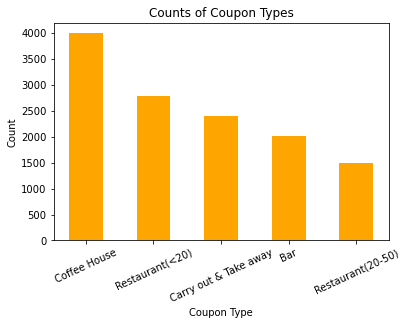

In [17]:
coupon_counts = pd.DataFrame(data.coupon.value_counts())
plt.bar(coupon_counts.index, coupon_counts.coupon, color ="orange", width = 0.5)
 
plt.xlabel("Coupon Type")
plt.xticks(rotation = 25)
plt.ylabel("Count")
plt.title("Counts of Coupon Types")
plt.show()

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

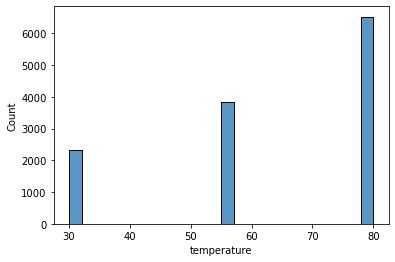

In [18]:
sns.histplot(data, x="temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
bar_coupons = data[data.coupon == 'Bar']
bar_coupons.shape

(2017, 24)

2. What proportion of bar coupons were accepted?


In [20]:
bar_coupons.Y.value_counts() / bar_coupons.shape[0]
# 58% of the data accept the coupon

0    0.589985
1    0.410015
Name: Y, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
t1 = bar_coupons[(bar_coupons.Bar == "1~3") | (bar_coupons.Bar == "less1") | (bar_coupons.Bar == "never")]
t1.Y.value_counts() / t1.shape[0]
# those who went to a bar 3 or fewer times a month accepts bar coupons 37%

0    0.629263
1    0.370737
Name: Y, dtype: float64

In [22]:
t2 = bar_coupons[(bar_coupons.Bar == "4~8") | (bar_coupons.Bar == "gt8")]
t2.Y.value_counts() / t2.shape[0]
# those who went to a bar more than 3 times a month accepts bar coupons 76%

1    0.768844
0    0.231156
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
# group1 = group in the definition
# group2 = all others
group1 = bar_coupons[(bar_coupons.Bar != "never") & (bar_coupons.Bar != "less1") & (bar_coupons.age != "21") & (bar_coupons.age != "below21")]
print(group1.shape)

group2 = bar_coupons[~((bar_coupons.Bar != "never") & (bar_coupons.Bar != "less1") & (bar_coupons.age != "21") & (bar_coupons.age != "below21"))]
print(group2.shape)

(420, 24)
(1597, 24)


In [24]:
group1.Y.value_counts() / group1.shape[0]
# 69% of the group1 accept bar coupon

1    0.695238
0    0.304762
Name: Y, dtype: float64

In [25]:
group2.Y.value_counts() / group2.shape[0]
# 33% of the group1 accept bar coupon
# yes, there is difference
# drivers who go to a bar more than once a month and are over the age of 25 are better accepter of bar coupons than others

0    0.664997
1    0.335003
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [26]:
group3 = bar_coupons[(bar_coupons.Bar != "never") & (bar_coupons.Bar != "less1") & ((bar_coupons.passanger == "Friend(s)") | (bar_coupons.age == "Partner")) & (bar_coupons.occupation != "Farming Fishing & Forestry")]
print(group3.shape)

(120, 24)


In [27]:
group3.Y.value_counts() / group3.shape[0]
# 79% of
# drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
# accept bar coupon

1    0.791667
0    0.208333
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [28]:
groupA = bar_coupons[(bar_coupons.Bar != "never") & (bar_coupons.Bar != "less1") & (bar_coupons.passanger != "Kid(s)") & (bar_coupons.maritalStatus != "Widowed")]
print(groupA.shape)
groupA.Y.value_counts() / groupA.shape[0]

(551, 24)


1    0.713249
0    0.286751
Name: Y, dtype: float64

In [29]:
groupB = bar_coupons[(bar_coupons.Bar != "never") & (bar_coupons.Bar != "less1") & ((bar_coupons.age == "below21") | (bar_coupons.age == "21") | (bar_coupons.age == "26"))]
print(groupB.shape)
groupB.Y.value_counts() / groupB.shape[0]

(345, 24)


1    0.721739
0    0.278261
Name: Y, dtype: float64

In [30]:
groupC = bar_coupons[((bar_coupons.RestaurantLessThan20 == "4~8") | (bar_coupons.RestaurantLessThan20 == "gt8")) & (bar_coupons.income.isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]))]
print(groupC.shape)
groupC.Y.value_counts() / groupC.shape[0]

(344, 24)


0    0.546512
1    0.453488
Name: Y, dtype: float64

In [31]:
# between the three groups given, first two groups are more likely to accept the coupon.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
"""
normally, a driver's chance to accept coupon is 50%.
from the data, bar coupons' acceptance ratio is 58% without any conditions.
so, i think 58% is threshold instead of 50%. hence, any ratio greater than 50% is "higher chance"

according to ratios printed above, group3 (drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry)
has the highest chance to accept bar copuns among all groups.
"""

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### starting w/ coffee house coupons

In [33]:
# since majority of the coupons are coffee house coupons, i want to focus on them
ch_coupons = data[data.coupon == "Coffee House"]
ch_coupons.shape

(3996, 24)

In [34]:
ch_coupons.describe(include = 'all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,3996,3996,3996,3996.000000,3996,3996,3996,3996,3996,3996,3996.000000,3996,3996,3996,3996,3996,3996,3996,3996,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
unique,3,4,3,NaN,5,1,2,2,8,5,NaN,6,25,9,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,2h,Female,21,Single,NaN,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN
freq,2155,2256,3467,NaN,1093,3996,2227,2051,883,1550,NaN,1371,570,640,1673,1075,1496,1679,1869,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,68.031782,NaN,NaN,NaN,NaN,NaN,NaN,0.387888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.518769,0.077578,0.187688,0.812312,0.499249
std,NaN,NaN,NaN,15.984543,NaN,NaN,NaN,NaN,NaN,NaN,0.487330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499710,0.267539,0.390511,0.390511,0.500062
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,1.000000


In [35]:
ch_coupons.corr()
# none of the numeric columns has high correlation value with Y
# column with the biggest correlation between Y is toCoupon_GEQ15min
# and even toCoupon_GEQ15min is not that important for Y

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.040143,-0.159504,-0.065255,0.013079,-0.013079,0.071293
has_children,-0.040143,1.000000,0.099610,0.011048,-0.039349,0.039349,-0.017294
toCoupon_GEQ15min,-0.159504,0.099610,1.000000,0.279314,-0.292558,0.292558,-0.094104
toCoupon_GEQ25min,-0.065255,0.011048,0.279314,1.000000,-0.139399,0.139399,-0.089372
direction_same,0.013079,-0.039349,-0.292558,-0.139399,1.000000,-1.000000,0.030204
direction_opp,-0.013079,0.039349,0.292558,0.139399,-1.000000,1.000000,-0.030204
Y,0.071293,-0.017294,-0.094104,-0.089372,0.030204,-0.030204,1.000000


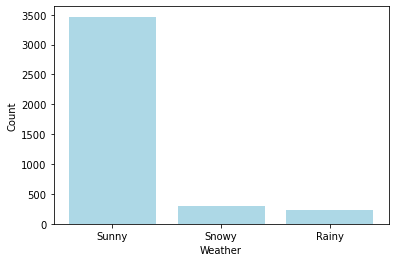

In [36]:
temp = pd.DataFrame(ch_coupons.weather.value_counts())
plt.bar(temp.index, temp[temp.columns[0]], color ="lightblue")
 
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

# most of the coffee house coupons offered on sunny days

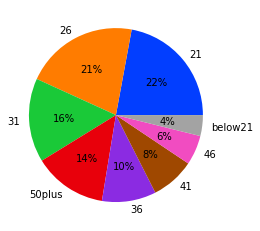

In [37]:
temp = pd.DataFrame(ch_coupons.age.value_counts())
plt.pie(temp.age, labels = temp.index, colors = sns.color_palette('bright'), autopct='%.0f%%')
plt.show()

# most of the drivers that offered a coupon are 26 and below

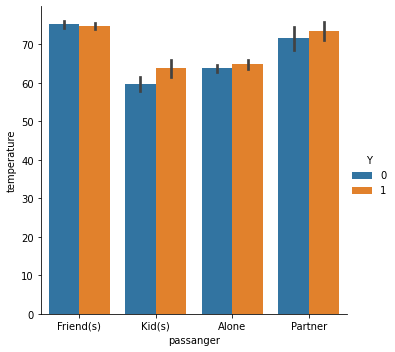

In [38]:
sns.catplot(data = ch_coupons, kind = "bar",
            x = "passanger", y = "temperature", hue = "Y")

# no differentiation neither on passanger nor temperature

In [39]:
ch_coupons.Y.value_counts() / ch_coupons.shape[0]

0    0.500751
1    0.499249
Name: Y, dtype: float64

In [40]:
youngs = ch_coupons[(ch_coupons.age == "21") | (ch_coupons.age == "below21") | (ch_coupons.age == "26")]
youngs.Y.value_counts() / youngs.shape[0]
# younger ages accepts coffee house coupons more

1    0.53429
0    0.46571
Name: Y, dtype: float64

In [41]:
# tried to add "Unemployed" but 62 drops to 58
students = ch_coupons[ch_coupons.occupation == "Student"]
students.Y.value_counts() / students.shape[0]

# students tend more to accept coffee house coupons

1    0.625251
0    0.374749
Name: Y, dtype: float64

In [42]:
first_group = ch_coupons[(ch_coupons.occupation == "Student") & ((ch_coupons.age == "21") | (ch_coupons.age == "below21") | (ch_coupons.age == "26"))]
first_group.Y.value_counts() / first_group.shape[0]

# drivers who are students and whose age 26 and below
# have more chance to accept coffee house coupons

1    0.637363
0    0.362637
Name: Y, dtype: float64

In [43]:
no_kids_pass = ch_coupons[(ch_coupons.passanger == "Partner") | (ch_coupons.passanger == "Friend(s)")]
no_kids_pass.Y.value_counts() / no_kids_pass.shape[0]

# drivers with passangers but without kids tend more to accept coffee house coupons

1    0.59165
0    0.40835
Name: Y, dtype: float64

In [44]:
second_group = ch_coupons[(ch_coupons.occupation == "Student") & ((ch_coupons.passanger == "Partner") | (ch_coupons.passanger == "Friend(s)"))]
second_group.Y.value_counts() / second_group.shape[0]

# drivers who is a student and have passanger (but not kids) with them
# have higher acceptance ratio than first group

1    0.725888
0    0.274112
Name: Y, dtype: float64

In [45]:
third_group = ch_coupons[((ch_coupons.age == "21") | (ch_coupons.age == "below21") | (ch_coupons.age == "26")) & ((ch_coupons.passanger == "Partner") | (ch_coupons.passanger == "Friend(s)"))]
third_group.Y.value_counts() / third_group.shape[0]

# drivers whose age 26 and below and have passanger (but not kids) with them
# have higher acceptance ratio than first group but not more than second group

1    0.621094
0    0.378906
Name: Y, dtype: float64

In [46]:
time = ch_coupons[(ch_coupons.time == "10AM") | (ch_coupons.time == "2PM")]
time.Y.value_counts() / time.shape[0]

# drivers' chances to accept coffee coupons are more on afternoons (-ish)

1    0.597165
0    0.402835
Name: Y, dtype: float64

In [47]:
fourth_group = ch_coupons[(ch_coupons.time == "10AM") | (ch_coupons.time == "2PM") & (ch_coupons.occupation == "Student") & ((ch_coupons.age == "21") | (ch_coupons.age == "below21") | (ch_coupons.age == "26"))]
fourth_group.Y.value_counts() / fourth_group.shape[0]

# drivers who get offer on afternoon and student and whose age 26 and below
# has slightly less chance to accept coffee house coupons

1    0.648185
0    0.351815
Name: Y, dtype: float64

In [48]:
fifth_group = ch_coupons[(ch_coupons.time == "10AM") | (ch_coupons.time == "2PM") & (ch_coupons.occupation == "Student") & ((ch_coupons.passanger == "Partner") | (ch_coupons.passanger == "Friend(s)"))]
fifth_group.Y.value_counts() / fifth_group.shape[0]

# drivers who get offer on afternoon and student and have passanger (but not kids) with them
# has slightly less chance to accept coffee house coupons

1    0.647944
0    0.352056
Name: Y, dtype: float64

In [ ]:
"""
my hypothesis for coffee coupons is that
drivers who is student and have passanger (but not kids) with them have really high chance to accept coffee house coupons.

"""

#### joint restaurant coupons

In [50]:
rest_coupons = data[data.coupon.isin(["Restaurant(<20)", "Restaurant(20-50)"])]
rest_coupons.shape

(4278, 24)

In [51]:
rest_coupons.describe(include = "all")

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,4278,4278,4278,4278.000000,4278,4278,4278,4278,4278,4278,4278.000000,4278,4278,4278,4278,4278,4278,4278,4278,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000
unique,3,4,3,NaN,5,2,2,2,8,5,NaN,6,25,9,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Restaurant(<20),1d,Female,21,Married partner,NaN,Bachelors degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN
freq,2126,2444,3487,NaN,1136,2786,2310,2175,867,1734,NaN,1469,644,673,1780,1135,1571,1800,2068,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,64.379383,NaN,NaN,NaN,NaN,NaN,NaN,0.421225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.512155,0.099579,0.177419,0.822581,0.614306
std,NaN,NaN,NaN,19.659406,NaN,NaN,NaN,NaN,NaN,NaN,0.493813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499911,0.299473,0.382068,0.382068,0.486816
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,1.000000


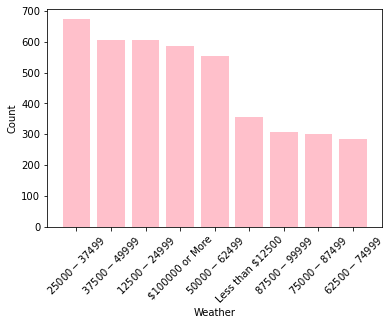

In [52]:
temp = pd.DataFrame(rest_coupons.income.value_counts())
plt.bar(temp.index, temp[temp.columns[0]], color ="pink")
 
plt.xlabel("Weather")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

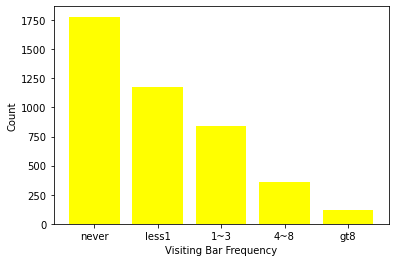

In [53]:
temp = pd.DataFrame(rest_coupons.Bar.value_counts())
plt.bar(temp.index, temp[temp.columns[0]], color ="yellow")
 
plt.xlabel("Visiting Bar Frequency")
plt.ylabel("Count")
plt.show()

# drivers who get offer of restaurant coupons are more likely to not visit a bar.
# does this situation have a connection with age?

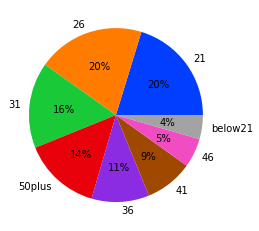

In [54]:
temp = pd.DataFrame(rest_coupons.age.value_counts())
plt.pie(temp.age, labels = temp.index, colors = sns.color_palette('bright'), autopct='%.0f%%')
plt.show()

# yes it has a connection with their age :)
# most of the drivers that offered a coupon are 26 and below

In [55]:
rest_coupons.Y.value_counts() / rest_coupons.shape[0]

# restaurant coupons accepted by 61%

1    0.614306
0    0.385694
Name: Y, dtype: float64

In [56]:
young_rest = rest_coupons[(rest_coupons.age == "below21") | (rest_coupons.age == "21") | (rest_coupons.age == "26")]
young_rest.Y.value_counts() / young_rest.shape[0]

# younger drivers tend to accept restaurant coupons

1    0.642745
0    0.357255
Name: Y, dtype: float64

In [57]:
non_bar_visitors = rest_coupons[(rest_coupons.Bar == "never") | (rest_coupons.age == "less1")]
non_bar_visitors.Y.value_counts() / non_bar_visitors.shape[0]

# not higher than threshold (61.4%)
# so age is more important than not-visiting bar

1    0.610112
0    0.389888
Name: Y, dtype: float64

In [58]:
low_income = rest_coupons[(rest_coupons.income == "$25000 - $37499") | (rest_coupons.age == "Less than $12500")  | (rest_coupons.age == "$37500 - $49999")]
low_income.Y.value_counts() / low_income.shape[0]

# drivers with income less than 50K tends more to accept restaurant coupons
# maybe its about their job? -- because, students doesnt earn much

1    0.67162
0    0.32838
Name: Y, dtype: float64

In [59]:
students_rest = rest_coupons[(rest_coupons.occupation == "Student")]
students_rest.Y.value_counts() / students_rest.shape[0]

# students have just a little higher chance to accept restaurant coupons
# so, no, it is probably not about being a student

1    0.619962
0    0.380038
Name: Y, dtype: float64

In [60]:
restaurant_group = rest_coupons[((rest_coupons.income == "$25000 - $37499") | (rest_coupons.age == "Less than $12500")  | (rest_coupons.age == "$37500 - $49999")) & ((rest_coupons.age == "below21") | (rest_coupons.age == "21") | (rest_coupons.age == "26"))]
restaurant_group.Y.value_counts() / restaurant_group.shape[0]

# just slightly better than the threshold (61.4%)

1    0.615616
0    0.384384
Name: Y, dtype: float64

In [ ]:
"""
my hypothesis for restaurant coupons is that
younger drivers wwith income less than 50K have more chance to accept restaurant coupons.

"""